In [414]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import math
%matplotlib inline

# DEFINING ERROR FUCNTIONS TO CALCULATE THE UNCERTAINTY IN THE EINSTIEN ANGLE 

DLS_error = DL_error = DS_error = 0.005
ER_error = 0.000005

def delF_delER(ER_error,DS,ER):
    return 1/(1+((ER/DS)**2))*ER_error

def delF_delDS(DS_error,DS,ER):
    return (1/(1+(ER/DS)**2))*1/(DS**2)*DS_error

# DEFINING FUNCTIONS FOR MASS UNCERTAINTY CALCULATIONS 

def delM_delEA(EA,DS,DL,DLS,G,c):
    return 2*EA*(c**2/(4*G))*(DS*DL/DLS)

def delM_delDS(EA,DS,DL,DLS,G,c):
    return (EA**2)*(c**2/(4*G))*(DL/DLS)

def delM_delDL(EA,DS,DL,DLS,G,c):   
    return (EA**2)*(c**2/(4*G))*(DS/DLS)

def delM_delDLS(EA,DS,DL,DLS,G,c):  
    return (EA**2)*(c**2/(4*G))*(DS*DL/(DLS**2))

# DEFINING ERROR FUNCTIONS FOR DISTANCE PARAMETER

def delD_delDLS(DLS,DL,DS):
    return 1/(DL*DS)

def delD_delDL(DLS,DL,DS):
    return DLS*((DL**2)*DS)

def delD_delDS(DLS,DL,DS):
    return DLS*((DS**2)*DL)

In [589]:
# SETTING UP ARRAYS FOR DISTANCE PARAMETERS AND EINSTIEN RADIUS MEASUREMENTS

Array = np.loadtxt('Lens 4 Data.txt', skiprows=1, delimiter=',')
Trial1 = Array[0]
Trial2 = Array[1]
Trial3 = Array[2]
Trial4 = Array[3]
Trial5 = Array[4]

DL = []
DL.append(Trial1[1])
DL.append(Trial2[1])
DL.append(Trial3[1])
DL.append(Trial4[1])
DL.append(Trial5[1])

DLS = []
DLS.append(Trial1[2])
DLS.append(Trial2[2])
DLS.append(Trial3[2])
DLS.append(Trial4[2])
DLS.append(Trial5[2])

ER = []
ER.append(Trial1[3]/2)     # divide by 2 because in the text document we have the diameter measurements 
ER.append(Trial2[3]/2)
ER.append(Trial3[3]/2)
ER.append(Trial4[3]/2)
ER.append(Trial5[3]/2)

print(ER)

print(Array)

[0.0437, 0.006305, 0.00579, 0.049, 0.03445]
[[1.      0.47    0.18    0.0874 ]
 [2.      0.42    0.23    0.01261]
 [3.      0.36    0.29    0.01158]
 [4.      0.27    0.38    0.098  ]
 [5.      0.2     0.45    0.0689 ]]


In [590]:
# SOLVING FOR THE EINSTIEN ANGLE AND THE UNCERTAINTIES

def angle_func(ER,DS):
    return math.atan(ER/DS)

EA = []
for i in range(5):
    EA.append(angle_func(ER[i], DL[i]+DLS[i]))
    
EA_error = []
for i in range (5):
    EA_error.append(delF_delER(ER_error,DL[i]+DLS[i],ER[i])+delF_delDS(DS_error,DL[i]+DLS[i],ER[i]))
    
print(EA)
print(EA_error)

[0.06712974922583828, 0.009699695792840194, 0.008907456719407002, 0.07524230074600732, 0.05295045780498185]
[0.011786046873717707, 0.011838205669855743, 0.011838380186884684, 0.01177241875166215, 0.011806156034326793]


In [591]:
# CALCULATING THE MASS AND UNCERTAINTIES

c = 3e8
G = 6.67e-11

def mass_func(c, G, EA, DL, DLS, DS):
    return (EA**2)*(c**2)*DS*DL/(4*G*DLS)

mass = []
for i in range(5):
    mass.append(mass_func(c, G, EA[i], DL[i], DLS[i], DL[i]+DLS[i]))
    
EA_differential = []

DS_differential = []
DL_differential = []
DLS_differential = []
mass_error = []

for i in range(5):
    EA_differential.append(delM_delEA(EA[i],DL[i]+DLS[i],DL[i],DLS[i],G,c))
    DS_differential.append(delM_delDS(EA[i],DL[i]+DLS[i],DL[i],DLS[i],G,c))
    DL_differential.append(delM_delDL(EA[i],DL[i]+DLS[i],DL[i],DLS[i],G,c))
    DLS_differential.append(delM_delDLS(EA[i],DL[i]+DLS[i],DL[i],DLS[i],G,c))
    mass_error.append(EA_differential[i]*EA_error[i]+DS_error*(DS_differential[i]+DL_differential[i]+DLS_differential[i]))
    
print(mass)
print(mass_error)

[2.5800340837862854e+24, 3.7671049792995532e+22, 2.1596430963174978e+22, 8.820116917997272e+23, 2.7322910616823932e+23]
[1.0249202723089053e+24, 9.351008972303576e+22, 5.8243537738026896e+22, 3.107229671588141e+23, 1.3381001469616374e+23]


In [592]:
# DISTANCE PARAMETER AND UNCERTAINTY CALCULATIONS 
# note: D = distance paramter: DLS/(DL*DS)

D = []
for i in range(5):
    D.append(DLS[i]/((DL[i]+DLS[i])*DL[i]))
    
D_error = []
for i in range(5):
    D_error.append(DS_error*(delD_delDLS(DLS[i],DL[i],0.65)+delD_delDL(DLS[i],DL[i],0.65)+delD_delDS(DLS[i],DL[i],0.65)))
    
print(D)
print(D_error)

[0.5891980360065467, 0.8424908424908425, 1.2393162393162394, 2.165242165242165, 3.4615384615384617]
[0.01667455611129296, 0.018650944815018316, 0.02171021436752137, 0.02879680249002849, 0.03871016346153846]


offset: 1.120549626398149e+23 +- 1.1955427201689829e+23
offset: -8.071881522555136e+22 +- 1.9383383044120886e+23


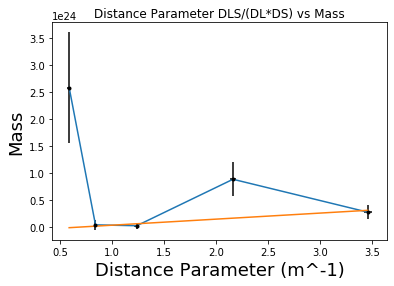

<Figure size 432x288 with 0 Axes>

In [593]:
plt.plot(D, mass)
plt.errorbar(D, mass, mass_error, D_error, fmt='k.')      

def func(x,m,b):                                 
    return m*x+b                                
 
initialguess = [1e24,-1e23]                     
                                        
fit, covariance = optimize.curve_fit(            
        func,                                    
        D,                                  
        mass,
        initialguess,
        mass_error)   

print("offset:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("offset:",fit[1],"+-",np.sqrt(covariance[1][1])) 

Dfit=np.linspace(min(D), max(D), 100) 
func_plot=func(Dfit,*fit)    

plt.plot(Dfit, func_plot) 

plt.title('Distance Parameter DLS/(DL*DS) vs Mass')
plt.xlabel('Distance Parameter (m^-1)',fontsize = 18)
plt.ylabel('Mass',fontsize = 18)

plt.show()
plt.savefig("./",dpi=300)         
plt.clf()

In [594]:
# EVALUATE THE THE POINTS ALONG BESTFIT LINE AT OUR DATA POINTS

def trendline_fit(m,x,b):
    return m*x+b

trendline = []
for i in range(5):
    trendline.append(trendline_fit(fit[0],D[i],fit[1]))
    
print(trendline)

[-1.4696251313385447e+22, 1.3686464654146187e+22, 5.815271966994574e+22, 1.6190731470681134e+23, 3.0716374775842335e+23]


In [595]:
# GETTING OUR WEIGHTS, AND THEN CALCULATING WEIGHTED AVERAGE

# WEIGHTED AVERAGE 1 = 2.498685959261379e+23
# WEIGHTED AVERAGE 2 = 9.68019573664252e+22
# WEIGHTED AVERAGE 3 = 4.649682788406193e+22
# WEIGHTED AVERAGE 4 = 2.0671208056661207e+23

weights = []
total_weights = 0

weight_mass = []
total_weight_mass = 0

for i in range(5):
    weights.append(1/mass_error[i])
    total_weights = total_weights + weights[i]
    weight_mass.append(mass[i]*weights[i])
    total_weight_mass = total_weight_mass + weight_mass[i]

print(total_weight_mass/total_weights)

2.0671208056661207e+23


offset: 1.3687561931489323 +- 2.301449587962754
offset: 3.9722781789902414e+23 +- 3.930980500592039e+23


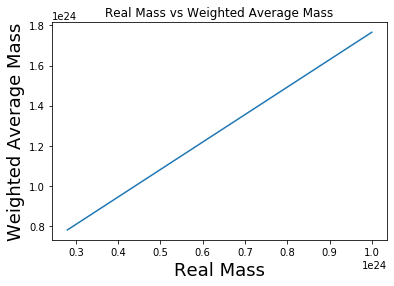

<Figure size 432x288 with 0 Axes>

In [573]:
# PLOTTING WEIGHTED AVERAGES WITH REAL MASS
Real_Mass = [1e24, 7.5e23, 3.8e23, 2.8e23]
Weighted_Mass = [2.498685959261379e+23, 9.68019573664252e+22, 4.649682788406193e+22, 2.0671208056661207e+23]

def func1(x,m,b):                                 
    return m*x+b                                
 
initialguess = [1e26,1e24]                     
                                        
fit, covariance = optimize.curve_fit(            
        func1,                                                                    
        Weighted_Mass,
        Real_Mass,  
        initialguess)   

print("offset:",fit[0],"+-",np.sqrt(covariance[0][0]))    
print("offset:",fit[1],"+-",np.sqrt(covariance[1][1])) 

Weighted_Massfit=np.linspace(min(Real_Mass), max(Real_Mass), 100) 
func1_plot=func(Weighted_Massfit,*fit)    

# plt.plot(Real_Mass, Weighted_Mass)
plt.plot(Weighted_Massfit, func1_plot) 

plt.title('Real Mass vs Weighted Average Mass')
plt.xlabel('Real Mass',fontsize = 18)
plt.ylabel('Weighted Average Mass',fontsize = 18)

plt.show()
plt.savefig("./images",dpi=300)         
plt.clf()